<a href="https://colab.research.google.com/github/JSEFERINO/Curso_Estadistica/blob/main/A9_Taller_Datos_agrupados_Daniela_Hollmann_Guarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FORMULARIO A9: Taller Datos agrupados**


**Nombre: Daniela Hollmann Guarin**

In [ ]:
# @title Tabla agrupada de frecuencias
import pandas as pd
import numpy as np

# Datos de peso
datos_peso = [45, 56, 67, 69, 50, 61, 50, 59, 70, 73, 65, 65, 57, 70, 80, 70, 62, 57, 60, 58, 65,
              72, 77, 71, 48, 90, 67, 55, 67, 72, 67, 102, 55, 60, 60, 75, 76, 55, 48, 88, 50, 59,
              60, 60, 64, 53, 49, 70, 80, 42, 59, 64, 65, 80, 62, 55, 60, 53, 62, 69, 60, 76, 78,
              70, 78, 52, 55, 48, 82, 65, 65, 50, 50, 54, 55, 60]

# Definir las clases
num_clases = 7
clases = pd.cut(datos_peso, bins=num_clases)

# Crear tabla de frecuencias
tabla_frecuencia = pd.DataFrame(clases.value_counts().sort_index())
tabla_frecuencia.columns = ['Frecuencia absoluta (fᵢ)']

# Agregar los intervalos de clase a la tabla, usando límites enteros
tabla_frecuencia['Intervalos de clase'] = tabla_frecuencia.index
tabla_frecuencia['Intervalos de clase'] = tabla_frecuencia['Intervalos de clase'].apply(lambda x: f'({int(x.left)}, {int(x.right)}]')

# Calcular la marca de clase (Xᵢ)
tabla_frecuencia['Marca de clase (Xᵢ)'] = [int(interval.mid) for interval in tabla_frecuencia.index]

# Calcular la frecuencia absoluta acumulada (Fᵢ)
tabla_frecuencia['Frecuencia absoluta acumulada (Fᵢ)'] = tabla_frecuencia['Frecuencia absoluta (fᵢ)'].cumsum()

# Calcular la frecuencia relativa (fᵢ)
tabla_frecuencia['Frecuencia relativa (fᵢ)'] = tabla_frecuencia['Frecuencia absoluta (fᵢ)'] / len(datos_peso)

# Calcular la frecuencia relativa acumulada (Fᵢ%)
tabla_frecuencia['Frecuencia relativa acumulada (Fᵢ%)'] = tabla_frecuencia['Frecuencia relativa (fᵢ)'].cumsum()

# Multiplicar por 100 para mostrar en porcentaje
tabla_frecuencia['Frecuencia relativa (fᵢ)'] = tabla_frecuencia['Frecuencia relativa (fᵢ)'] * 100
tabla_frecuencia['Frecuencia relativa acumulada (Fᵢ%)'] = tabla_frecuencia['Frecuencia relativa acumulada (Fᵢ%)'] * 100

# Mostrar la tabla final con separación vertical
print(tabla_frecuencia[['Intervalos de clase', 'Frecuencia absoluta (fᵢ)', 'Marca de clase (Xᵢ)',
                        'Frecuencia absoluta acumulada (Fᵢ)', 'Frecuencia relativa (fᵢ)',
                        'Frecuencia relativa acumulada (Fᵢ%)']].to_string(index=False))

Intervalos de clase  Frecuencia absoluta (fᵢ)  Marca de clase (Xᵢ)  Frecuencia absoluta acumulada (Fᵢ)  Frecuencia relativa (fᵢ)  Frecuencia relativa acumulada (Fᵢ%)
           (41, 50]                        11                   46                                  11                 14.473684                            14.473684
           (50, 59]                        17                   54                                  28                 22.368421                            36.842105
           (59, 67]                        24                   63                                  52                 31.578947                            68.421053
           (67, 76]                        14                   72                                  66                 18.421053                            86.842105
           (76, 84]                         7                   80                                  73                  9.210526                            96.052632
    

In [ ]:
# @title Paso 1: Medidas de tendencia central (Media, Mediana y Moda)
import numpy as np
import scipy.stats as stats

# Datos de peso
datos_peso = [45, 56, 67, 69, 50, 61, 50, 59, 70, 73, 65, 65, 57, 70, 80, 70, 62, 57, 60, 58, 65,
              72, 77, 71, 48, 90, 67, 55, 67, 72, 67, 102, 55, 60, 60, 75, 76, 55, 48, 88, 50, 59,
              60, 60, 64, 53, 49, 70, 80, 42, 59, 64, 65, 80, 62, 55, 60, 53, 62, 69, 60, 76, 78,
              70, 78, 52, 55, 48, 82, 65, 65, 50, 50, 54, 55, 60]

# Media
media = np.mean(datos_peso)

# Mediana
mediana = np.median(datos_peso)

# Moda
moda = stats.mode(datos_peso, keepdims=True).mode[0]

# Resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 63.526315789473685
Mediana: 62.0
Moda: 60


In [ ]:
# @title Paso 2: Medidas de posición (Q1, Q3, D3, D8)
# Cuartiles
q1 = np.percentile(datos_peso, 25)
q3 = np.percentile(datos_peso, 75)

# Deciles
d3 = np.percentile(datos_peso, 30)
d8 = np.percentile(datos_peso, 80)

# Resultados
print(f"Q1 (1er cuartil): {q1}")
print(f"Q3 (3er cuartil): {q3}")
print(f"D3 (3er decil): {d3}")
print(f"D8 (8vo decil): {d8}")

Q1 (1er cuartil): 55.0
Q3 (3er cuartil): 70.0
D3 (3er decil): 57.0
D8 (8vo decil): 72.0


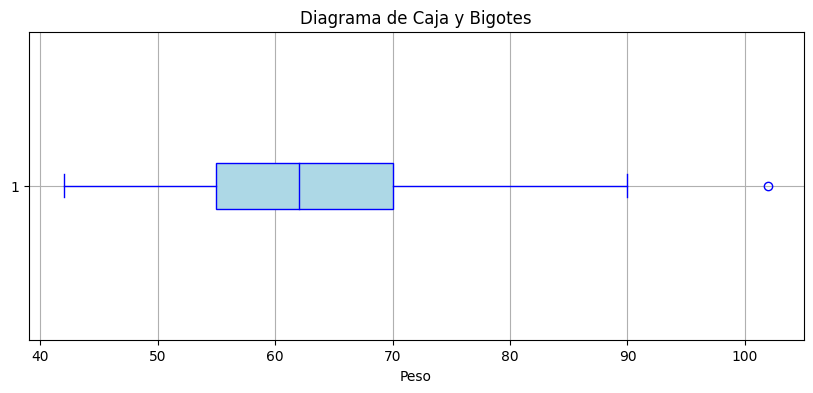

In [ ]:
# @title Paso 3: Diagrama de Caja y Bigotes
import matplotlib.pyplot as plt

# Datos de peso
datos_peso = [45, 56, 67, 69, 50, 61, 50, 59, 70, 73, 65, 65, 57, 70, 80, 70, 62, 57, 60, 58, 65,
              72, 77, 71, 48, 90, 67, 55, 67, 72, 67, 102, 55, 60, 60, 75, 76, 55, 48, 88, 50, 59,
              60, 60, 64, 53, 49, 70, 80, 42, 59, 64, 65, 80, 62, 55, 60, 53, 62, 69, 60, 76, 78,
              70, 78, 52, 55, 48, 82, 65, 65, 50, 50, 54, 55, 60]

# Crear el diagrama de caja y bigotes horizontal
plt.figure(figsize=(10, 4))
plt.boxplot(datos_peso, patch_artist=True, vert=False, boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
            medianprops=dict(color='blue'), flierprops=dict(markeredgecolor='blue'))

# Configuración del gráfico
plt.title('Diagrama de Caja y Bigotes')
plt.xlabel('Peso')
plt.grid(True)

# Mostrar gráfico
plt.show()

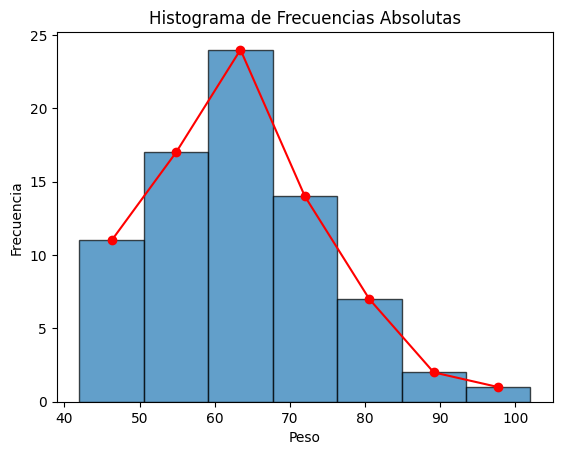

In [ ]:
# @title Paso 4 y 5: Histograma de frecuencias absolutas y polígono de frecuencias
# Histograma de frecuencias absolutas
plt.hist(datos_peso, bins=7, edgecolor='black', alpha=0.7)
plt.title('Histograma de Frecuencias Absolutas')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')

# Dibujar el polígono de frecuencias
frequencies, bins, _ = plt.hist(datos_peso, bins=7, edgecolor='black', alpha=0.0)  # Solo obtener datos del histograma
plt.plot((bins[:-1] + bins[1:]) / 2, frequencies, color='red', marker='o')  # Polígono

# Mostrar gráfico
plt.show()

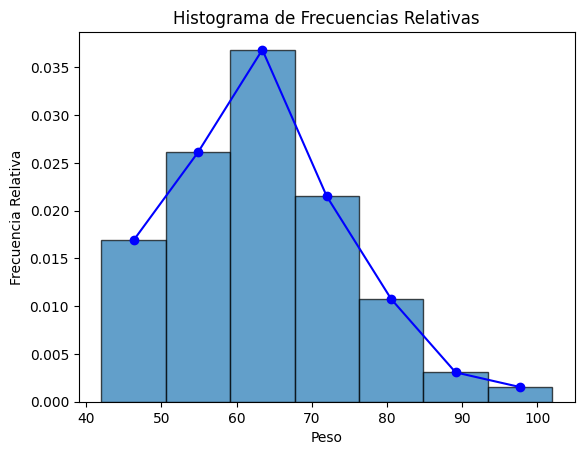

In [ ]:
# @title Paso 6: Histograma de frecuencias relativas y polígono
import matplotlib.pyplot as plt

# Calcular las frecuencias relativas
frecuencias_relativas, bins, _ = plt.hist(datos_peso, bins=7, density=True, edgecolor='black', alpha=0.7)
plt.title('Histograma de Frecuencias Relativas')
plt.xlabel('Peso')
plt.ylabel('Frecuencia Relativa')

# Dibujar el polígono de frecuencias relativas
centros_clases = (bins[:-1] + bins[1:]) / 2
plt.plot(centros_clases, frecuencias_relativas, color='blue', marker='o')  # Polígono

# Mostrar gráfico
plt.show()

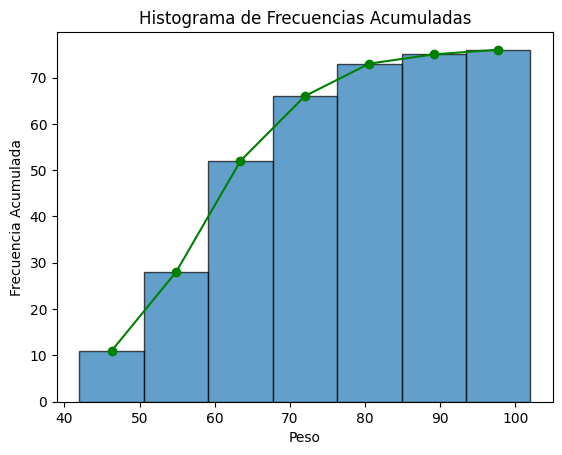

In [ ]:
# @title Paso 7: Histograma de frecuencias acumuladas y polígono
# Histograma de frecuencias acumuladas
plt.hist(datos_peso, bins=7, cumulative=True, edgecolor='black', alpha=0.7)
plt.title('Histograma de Frecuencias Acumuladas')
plt.xlabel('Peso')
plt.ylabel('Frecuencia Acumulada')

# Dibujar el polígono de frecuencias acumuladas
frequencies, bins, _ = plt.hist(datos_peso, bins=7, cumulative=True, edgecolor='black', alpha=0.0)  # Solo obtener datos
plt.plot((bins[:-1] + bins[1:]) / 2, frequencies, color='green', marker='o')  # Polígono

# Mostrar gráfico
plt.show()

In [ ]:
# @title Paso 8: Medidas de tendencia central agrupadas (Media, Mediana y Moda)
import pandas as pd
import numpy as np

# Datos de peso
datos_peso = [45, 56, 67, 69, 50, 61, 50, 59, 70, 73, 65, 65, 57, 70, 80, 70, 62, 57, 60, 58, 65,
              72, 77, 71, 48, 90, 67, 55, 67, 72, 67, 102, 55, 60, 60, 75, 76, 55, 48, 88, 50, 59,
              60, 60, 64, 53, 49, 70, 80, 42, 59, 64, 65, 80, 62, 55, 60, 53, 62, 69, 60, 76, 78,
              70, 78, 52, 55, 48, 82, 65, 65, 50, 50, 54, 55, 60]

# Definir las clases
num_clases = 7
clases = pd.cut(datos_peso, bins=num_clases)

# Crear tabla de frecuencias
tabla_frecuencia = pd.DataFrame(clases.value_counts().sort_index())
tabla_frecuencia.columns = ['Frecuencia absoluta (fᵢ)']

# Agregar los intervalos de clase
tabla_frecuencia['Intervalos de clase'] = tabla_frecuencia.index
tabla_frecuencia['Marca de clase (Xᵢ)'] = [interval.mid for interval in tabla_frecuencia['Intervalos de clase']]

# Media agrupada
media_agrupada = np.average(tabla_frecuencia['Marca de clase (Xᵢ)'], weights=tabla_frecuencia['Frecuencia absoluta (fᵢ)'])

# Mediana agrupada (aproximada)
n = len(datos_peso)
F_ant = tabla_frecuencia['Frecuencia absoluta (fᵢ)'].cumsum().shift(1).fillna(0)
Li = tabla_frecuencia['Intervalos de clase'].apply(lambda x: x.left)
marca_clase = tabla_frecuencia['Marca de clase (Xᵢ)']
f_i = tabla_frecuencia['Frecuencia absoluta (fᵢ)']

# Calcular amplitud de clase correctamente
amplitud_clase = tabla_frecuencia['Intervalos de clase'].apply(lambda x: x.right - x.left).values[0]  # Amplitud del primer intervalo

# Fórmula de mediana agrupada
L_mediana = Li[(F_ant + f_i).ge(n / 2).idxmax()]
F_ant_mediana = F_ant[(F_ant + f_i).ge(n / 2).idxmax()]
f_mediana = f_i[(F_ant + f_i).ge(n / 2).idxmax()]
mediana_agrupada = L_mediana + (n / 2 - F_ant_mediana) / f_mediana * amplitud_clase

# Moda agrupada
moda_agrupada = marca_clase[f_i.idxmax()]

# Resultados
print(f"Media agrupada: {media_agrupada}")
print(f"Mediana agrupada: {mediana_agrupada}")
print(f"Moda agrupada: {moda_agrupada}")

Media agrupada: 63.311375
Mediana agrupada: 62.73925
Moda agrupada: 63.4285


In [ ]:
# @title Paso 9: Medidas de posición agrupadas (Q1, Q3, D3, D8)
# Para cuartiles y deciles agrupados se usa una aproximación similar a la mediana agrupada
def posicion_agrupada(q, n):
    L = Li[(F_ant + f_i).ge(n * q).idxmax()]
    F_ant_q = F_ant[(F_ant + f_i).ge(n * q).idxmax()]
    f_q = f_i[(F_ant + f_i).ge(n * q).idxmax()]
    return L + (n * q - F_ant_q) / f_q * amplitud_clase

q1_agrupado = posicion_agrupada(0.25, n)
q3_agrupado = posicion_agrupada(0.75, n)
d3_agrupado = posicion_agrupada(0.3, n)
d8_agrupado = posicion_agrupada(0.8, n)

# Resultados
print(f"Q1 agrupado: {q1_agrupado}")
print(f"Q3 agrupado: {q3_agrupado}")
print(f"D3 agrupado: {d3_agrupado}")
print(f"D8 agrupado: {d8_agrupado}")

Q1 agrupado: 54.63264705882353
Q3 agrupado: 70.7965
D3 agrupado: 56.56192941176471
D8 agrupado: 73.1392


In [ ]:
# @title Paso 10: Intervalo de confianza del 95% para la media
import scipy.stats as stats

# Media y desviación estándar de los datos individuales
media = np.mean(datos_peso)
desviacion_estandar = np.std(datos_peso, ddof=1)

# Intervalo de confianza del 95%
n = len(datos_peso)
nivel_confianza = 0.95
error_estandar = desviacion_estandar / np.sqrt(n)
intervalo_confianza = stats.t.interval(nivel_confianza, df=n-1, loc=media, scale=error_estandar)

# Resultados
print(f"Intervalo de confianza del 95% para la media: {intervalo_confianza}")

Intervalo de confianza del 95% para la media: (60.956832205954484, 66.09579937299289)
